# Day 9, Exploratory Data Analysis Part II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10)

In [4]:
bnbs = pd.read_csv("data/airbnb_new_cols.csv")
bnbs.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,relative_reviews,price_ratings
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1,57,Few have Bnb-ed here,$
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1,46,Few have Bnb-ed here,$
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1,69,Few have Bnb-ed here,$
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1,58,Loads have Bnb-ed here,$
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1,67,Many have Bnb-ed here,$


In [5]:
bnbs.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                  int64
price                     int64
relative_reviews         object
price_ratings            object
dtype: object

In [6]:
#Function to make all the numerical variable's into visual graphs

def numerical_variable_distribution(df, col):
    #df[col].plot.hist()
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()

In [7]:
numerical_columns = bnbs.select_dtypes(np.number).columns.tolist()

In [8]:
from ipywidgets import interact, fixed

In [9]:
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(bnbs));

A Jupyter Widget

In [11]:
#Function to make all the categorical data into visual representations
def categorical_variable_distributions(col):
    bnbs[col].value_counts(ascending=True,normalize=True).tail(10).plot.barh()
    plt.show()

In [12]:
categorical_columns = bnbs.select_dtypes(["object","category"]).columns.tolist()

In [13]:
interact(categorical_variable_distributions,col=categorical_columns);

A Jupyter Widget

## Set a group count

In [14]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [15]:
#Make a pivot counter on the number of airbnbs there are based on the number of people can stay in each neighborhood
accomodates_by_neighborhood= pivot_count(bnbs, "accommodates","neighborhood", "reviews")
accomodates_by_neighborhood

neighborhood,Ajuda,Alcântara,Alvalade,Areeiro,Arroios,Avenidas Novas,Beato,Belém,Benfica,Campo de Ourique,...,Marvila,Misericórdia,Olivais,Parque das Nações,Penha de França,Santa Clara,Santa Maria Maior,Santo António,São Domingos de Benfica,São Vicente
accommodates,,,,,,,,,,,,,,,,,,,,,
1,5.0,10.0,48.0,45.0,122.0,64.0,2.0,5.0,4.0,13.0,...,5.0,43.0,11.0,5.0,41.0,4.0,60.0,49.0,11.0,27.0
2,28.0,72.0,83.0,105.0,645.0,239.0,50.0,53.0,21.0,103.0,...,14.0,598.0,40.0,48.0,168.0,8.0,736.0,317.0,53.0,277.0
3,12.0,17.0,25.0,18.0,123.0,51.0,5.0,28.0,6.0,39.0,...,5.0,246.0,8.0,25.0,30.0,4.0,295.0,101.0,8.0,93.0
4,36.0,65.0,49.0,47.0,344.0,85.0,21.0,87.0,14.0,92.0,...,16.0,740.0,25.0,89.0,89.0,7.0,930.0,308.0,33.0,366.0
5,12.0,13.0,13.0,20.0,97.0,18.0,2.0,22.0,9.0,23.0,...,1.0,185.0,7.0,22.0,22.0,NaN,198.0,66.0,10.0,74.0
6,10.0,21.0,22.0,15.0,155.0,51.0,2.0,39.0,13.0,27.0,...,4.0,339.0,13.0,44.0,36.0,NaN,373.0,134.0,11.0,137.0
7,2.0,3.0,4.0,5.0,30.0,9.0,1.0,5.0,2.0,6.0,...,2.0,57.0,1.0,9.0,1.0,NaN,58.0,23.0,2.0,20.0
8,2.0,6.0,6.0,10.0,56.0,18.0,1.0,6.0,NaN,4.0,...,3.0,85.0,1.0,8.0,10.0,NaN,74.0,44.0,6.0,19.0
9,NaN,1.0,1.0,5.0,15.0,7.0,NaN,1.0,1.0,1.0,...,NaN,20.0,NaN,NaN,2.0,NaN,13.0,6.0,1.0,6.0


In [16]:
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2, "reviews")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [17]:
interact(heatmap_count_types, col1=bnbs.columns.drop(["room_id", "host_id", "bedrooms"]),
                                 col2=bnbs.columns.drop(["room_id", "host_id", "bedrooms","price_ratings"]),
                                 df=fixed(bnbs));

A Jupyter Widget

# Standardization, dealing with missing data 

In [18]:
n_records = len(bnbs)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_col(bnbs)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | int64
price | 0.0 | int64
relative_reviews | 0.0 | object
price_ratings | 0.0 | object


In [21]:
bnbs["overall_satisfaction"] = bnbs.overall_satisfaction.fillna(0.0)
bnbs.shape

(13232, 11)

In [22]:
bnbs[bnbs.overall_satisfaction==0.0]

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,relative_reviews,price_ratings
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1,46,Few have Bnb-ed here,$
10,33348,144484,Private room,Lumiar,2,0.0,6,1,46,Few have Bnb-ed here,$
11,34783,149980,Private room,Estrela,0,0.0,1,1,54,Few have Bnb-ed here,$
20,55116,259744,Private room,Avenidas Novas,1,0.0,2,2,68,Few have Bnb-ed here,$
26,72807,378525,Private room,Alvalade,1,0.0,1,1,29,Few have Bnb-ed here,$
37,88282,184400,Entire home/apt,Santo António,1,0.0,4,1,87,Few have Bnb-ed here,$
42,90559,184400,Entire home/apt,Santo António,2,0.0,4,1,87,Few have Bnb-ed here,$
49,101200,530574,Private room,São Domingos de Benfica,2,0.0,1,1,35,Few have Bnb-ed here,$
61,122572,614156,Private room,São Domingos de Benfica,0,0.0,2,1,64,Few have Bnb-ed here,$
77,135493,184400,Entire home/apt,Estrela,0,0.0,10,4,173,Few have Bnb-ed here,$


In [23]:
bnbs.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13232.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.282195,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.124352,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


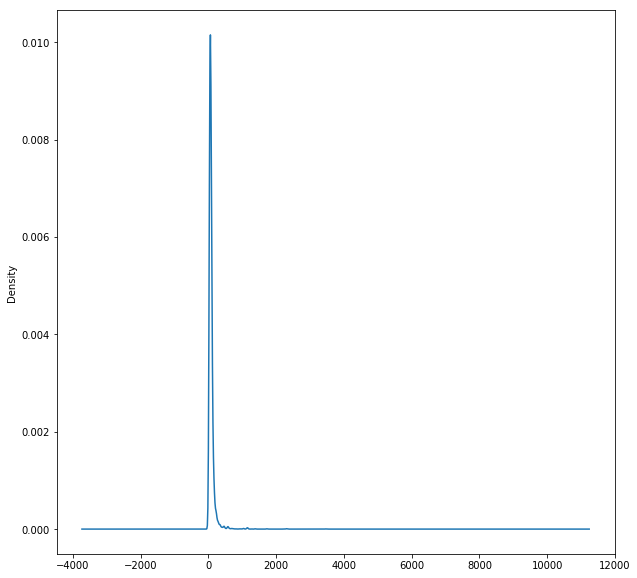

In [25]:
bnbs.price.plot.kde()